In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Findings:

We have 12 object type columns and 15 numeric columns

Several columns have been identified with only 1 unique value, while some have been identified as containing only null values

In [15]:
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)

In [16]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [17]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [18]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [19]:
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [20]:
df.drop(columns=["name","gppd_idnr","owner","url","generation_gwh_2013",'generation_gwh_2019'],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


In [22]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [23]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [24]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


"latitude" is numerical in nature with very low skewness and outliers.

"other_fuel1" and "geolocation_source" are object data types

"longitude", "commissioning_year", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018" seem to have high skewness with some far reaching outliers.

In [25]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [26]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [29]:
df['plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [30]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


Null values in the dataset taken care of
Lot of outliers, with skewness across columns can be seen

In [31]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)

In [32]:
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)

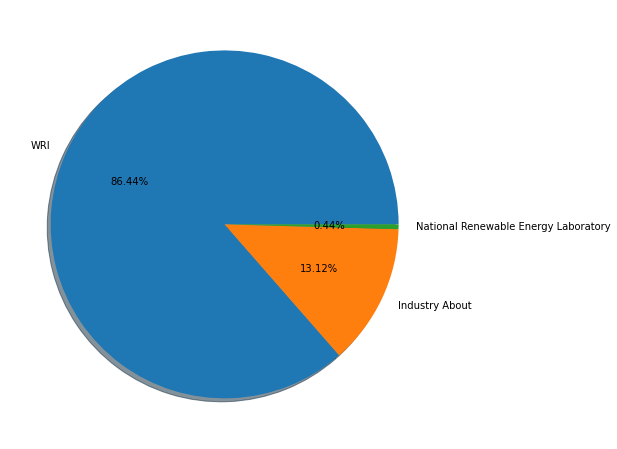

In [33]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

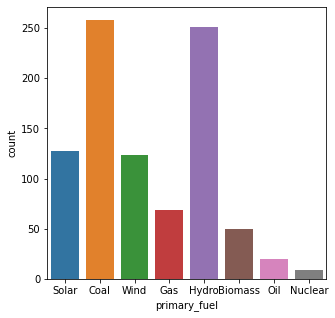

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(df['primary_fuel'])
plt.show()

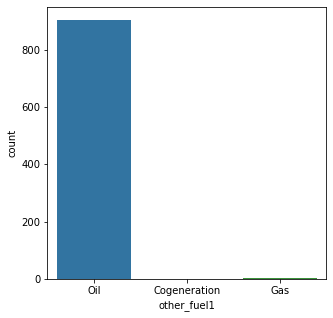

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

In [36]:
print(df["other_fuel1"].value_counts())

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


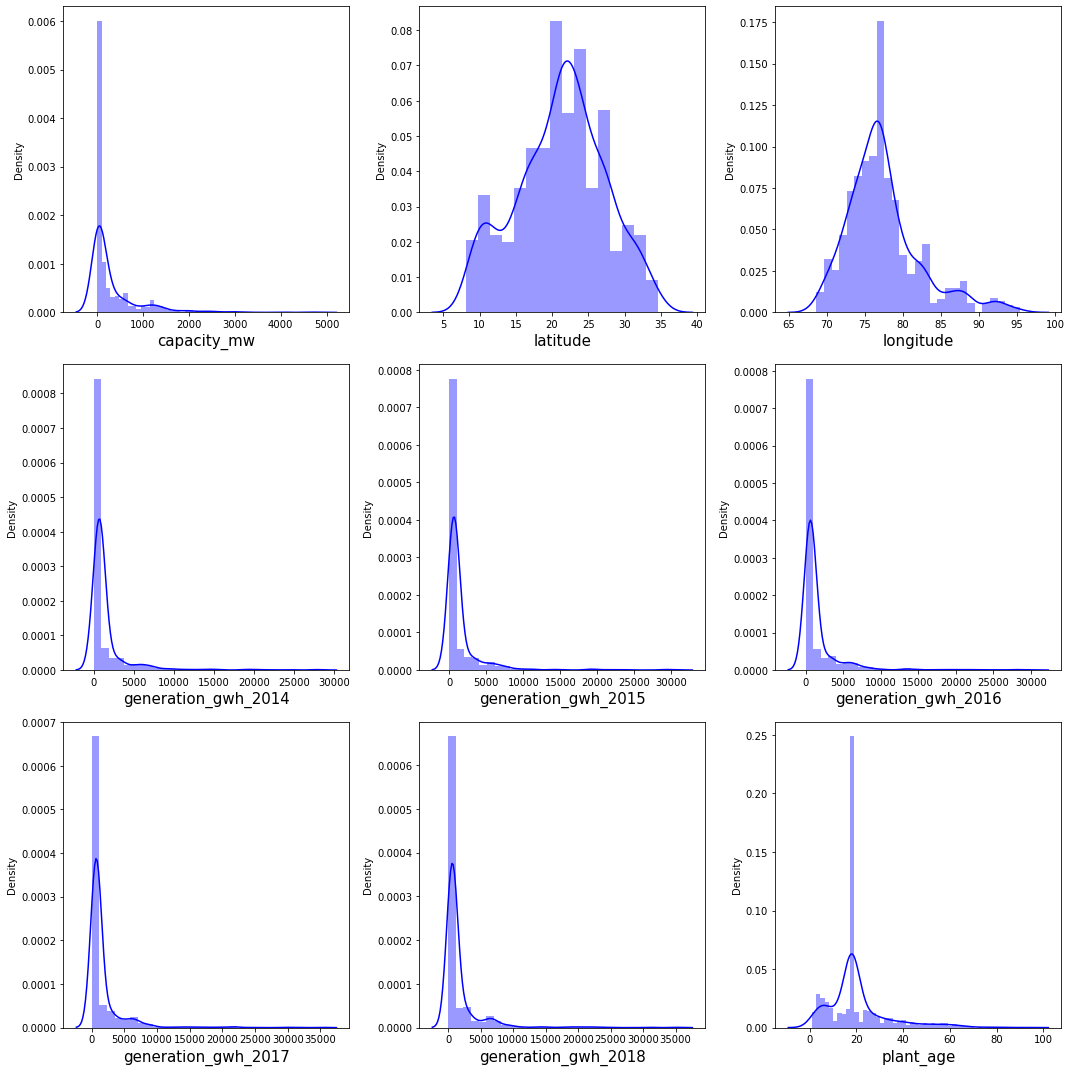

In [50]:
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

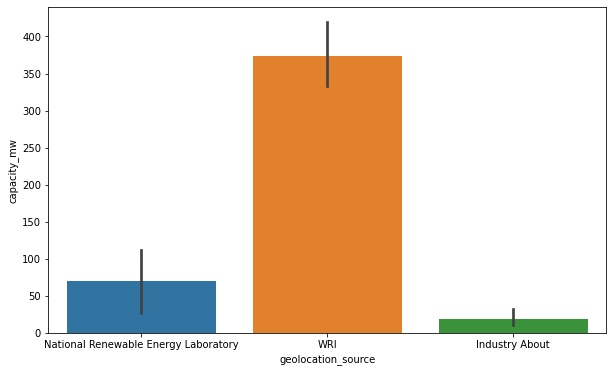

In [38]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

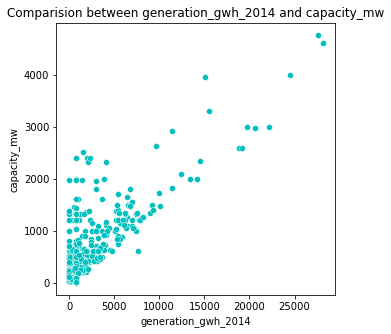

In [40]:
plt.figure(figsize = (5,5))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="c")
plt.show()

<AxesSubplot:title={'center':'Comparision between plant_age and capacity_mw'}, xlabel='plant_age', ylabel='capacity_mw'>

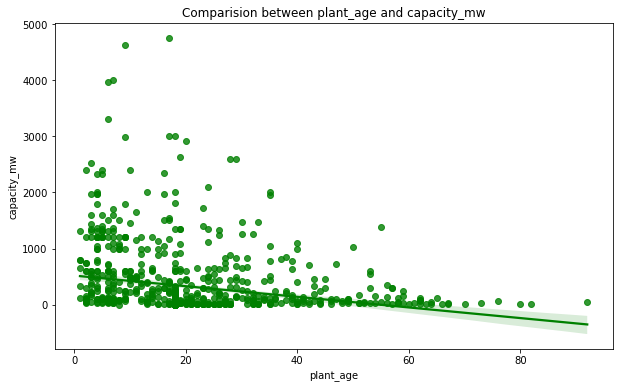

In [41]:
plt.figure(figsize=[10,6])
plt.title('Comparision between plant_age and capacity_mw')
sns.regplot(df['plant_age'],df['capacity_mw'],color = "g")

New plants seem to have higher capacity as compared to older plants

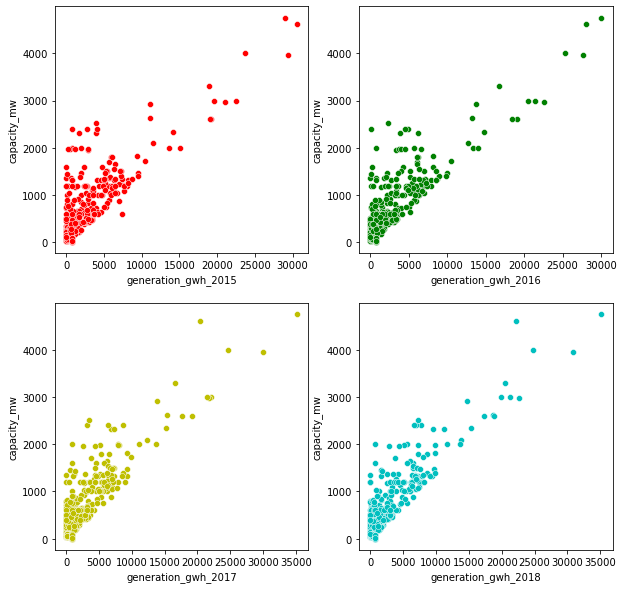

In [43]:
fig,axes=plt.subplots(2,2,figsize=(10,10))

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="y")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="g")

# Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="c")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="r")

plt.show()

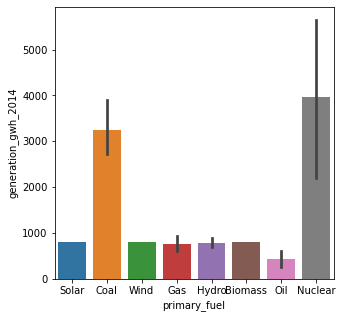

In [59]:
plt.figure(figsize = (5,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)
plt.show()

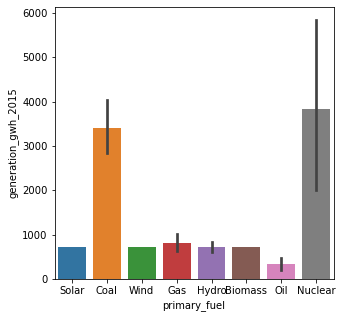

In [53]:
plt.figure(figsize = (5,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)
plt.show()

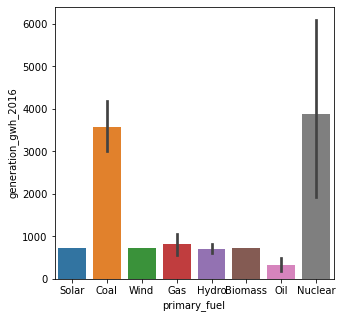

In [58]:
plt.figure(figsize = (5,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)
plt.show()

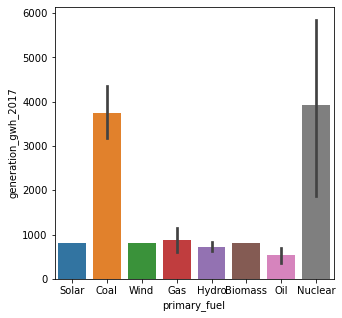

In [60]:
plt.figure(figsize = (5,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)
plt.show()

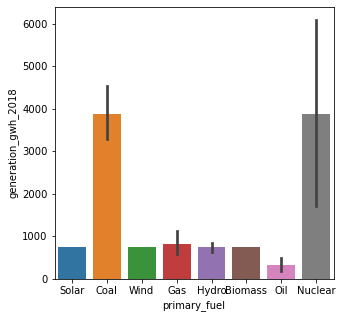

In [61]:
plt.figure(figsize = (5,5))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.show()

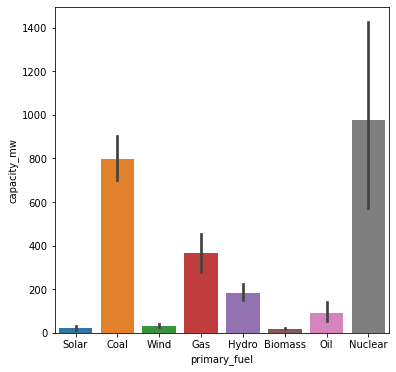

In [62]:
plt.figure(figsize = (6,6))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

Capacity of generating electricity is high in Nuclear and Coal plants, with very low capacity in solar, wind and biomass plants

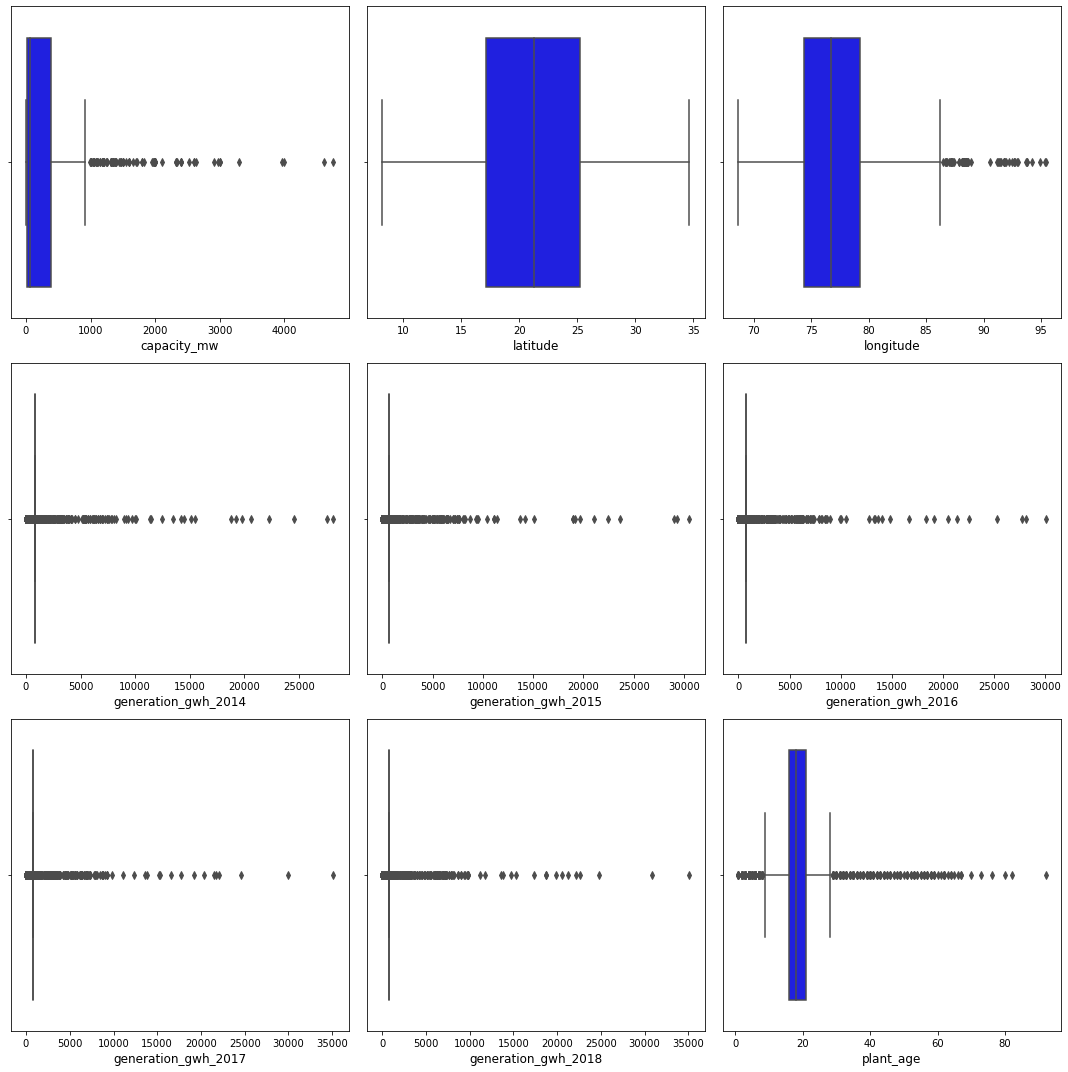

In [63]:
#Outlier check
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='b')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Except for "latitude", all columns have outliers.

In [65]:
feat = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']]

In [66]:
from scipy.stats import zscore

z=np.abs(zscore(feat))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [68]:
new_df = df[(z<3).all(axis=1)]

In [71]:
df.shape

(907, 13)

In [73]:
new_df.shape

(851, 13)

In [81]:
print("data loss is : ",(907-851)/907*100, "%") 

data loss is :  6.174200661521499 %


In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
categorical_col = ['primary_fuel','other_fuel1','source','geolocation_source']
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [77]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


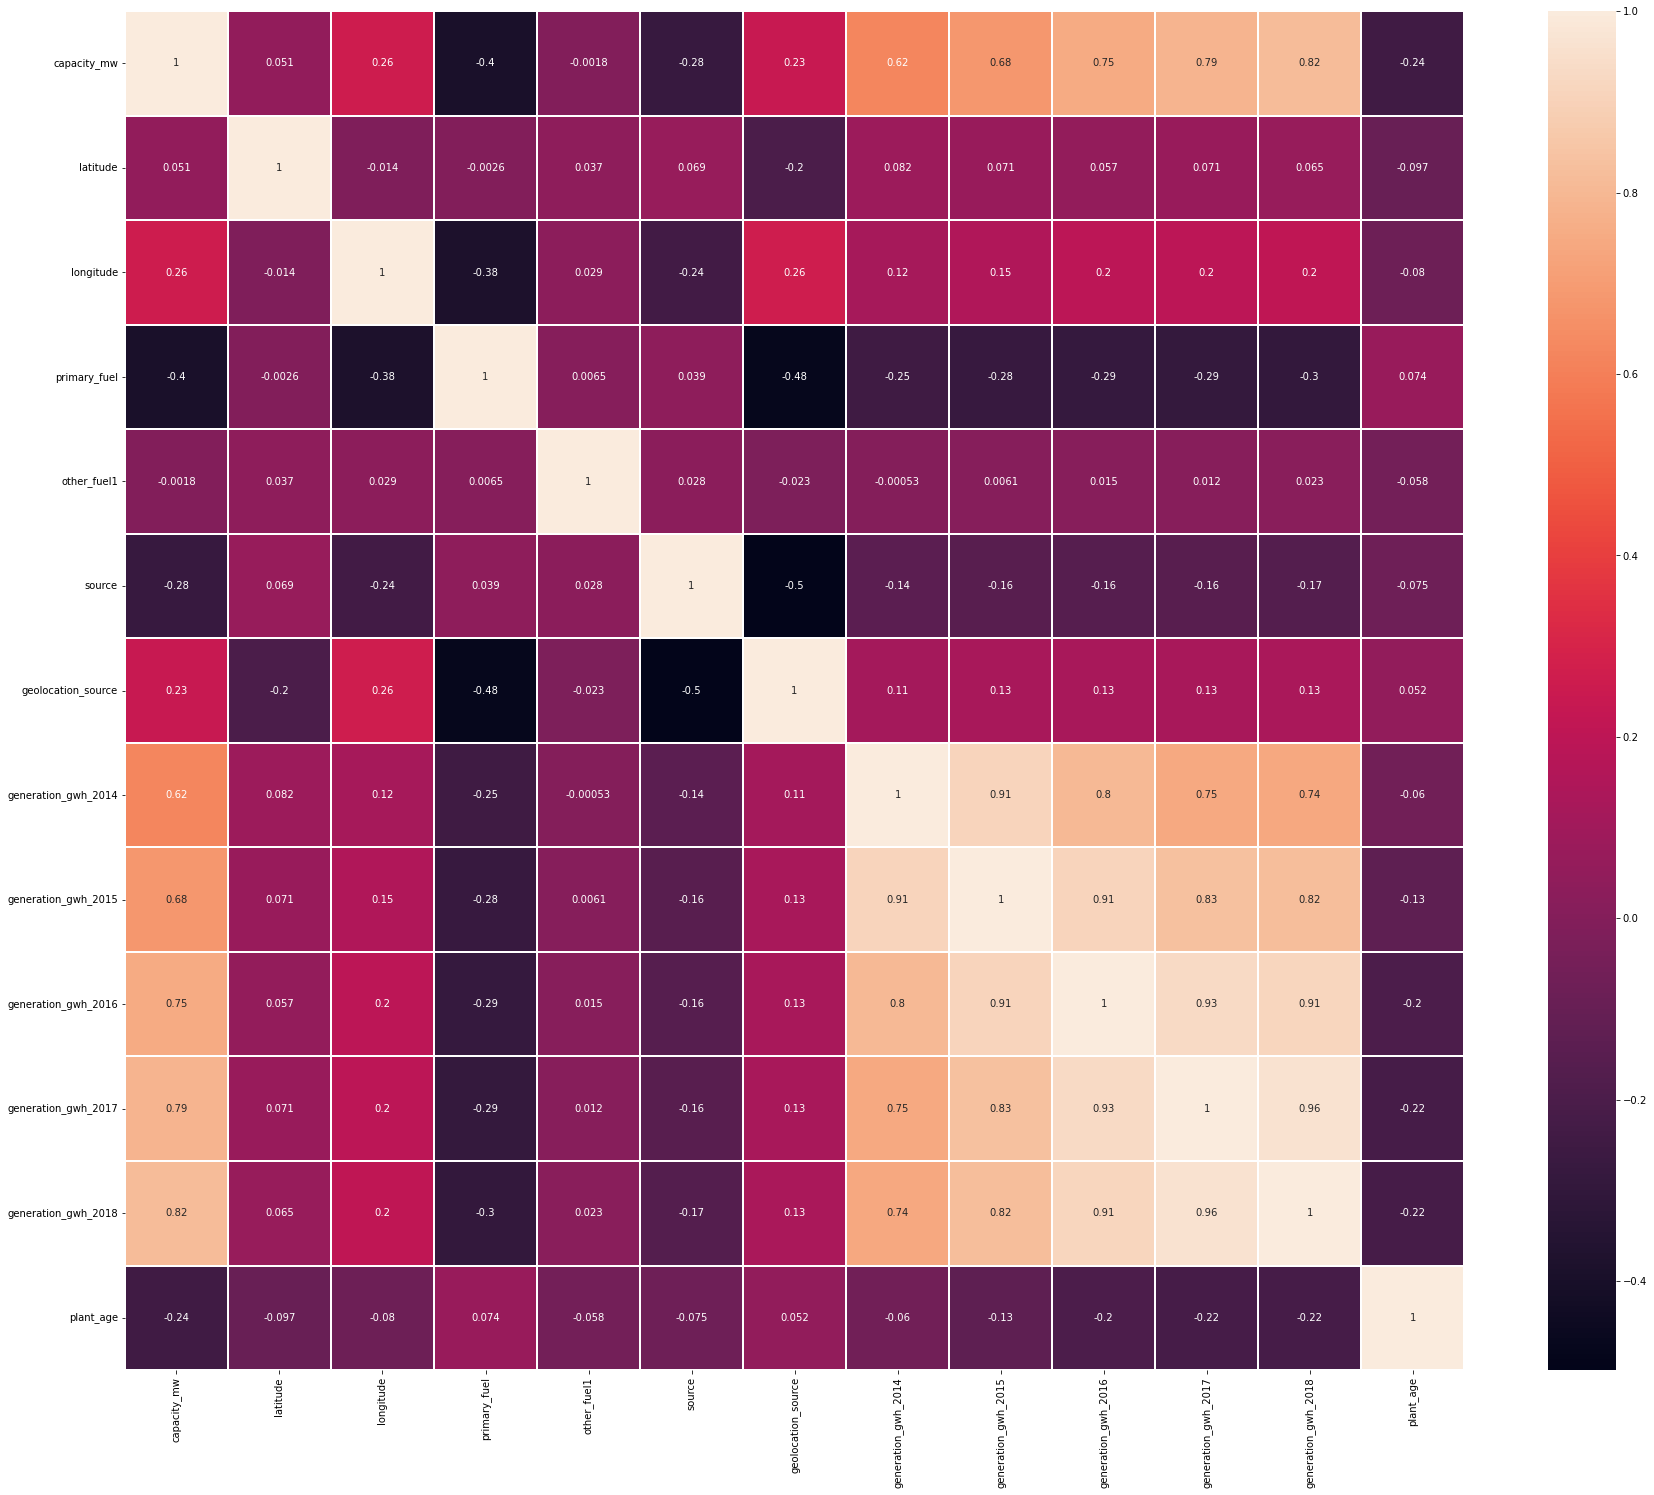

In [84]:
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=0.1,annot=True)
plt.show()

In [83]:
#Correlations
new_df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


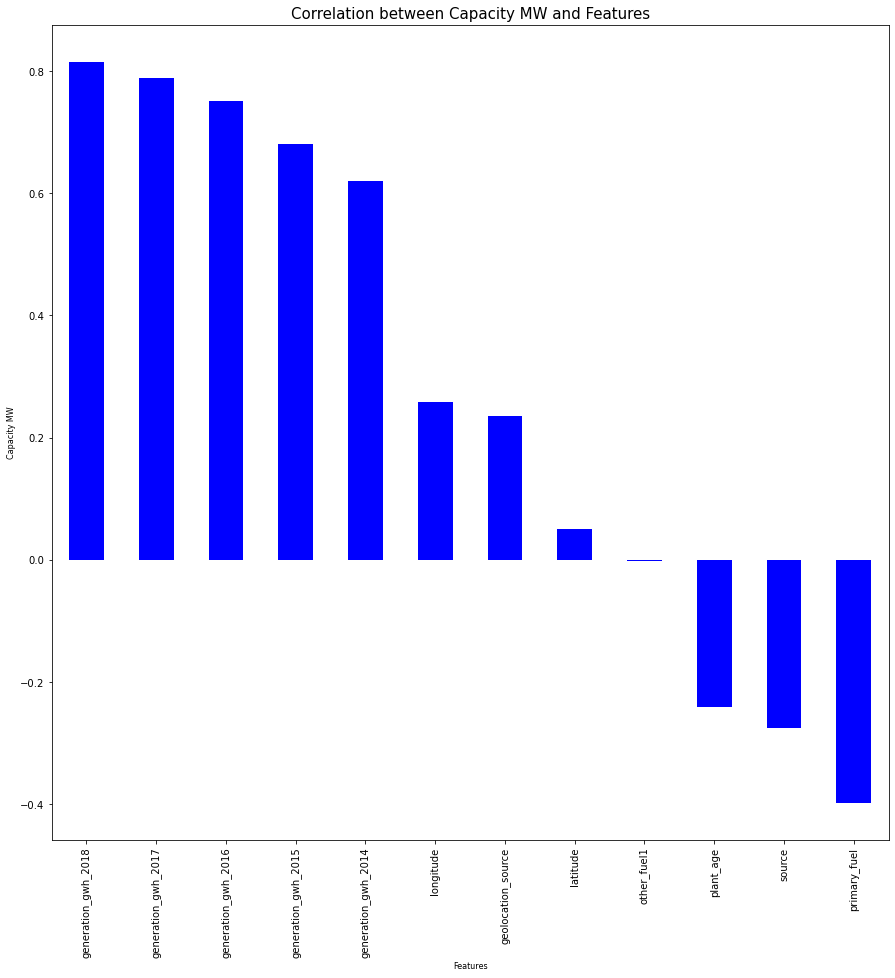

In [86]:
plt.figure(figsize=(15,15))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=8)
plt.ylabel('Capacity MW',fontsize=8)
plt.title('Correlation between Capacity MW and Features',fontsize=15)
plt.show()

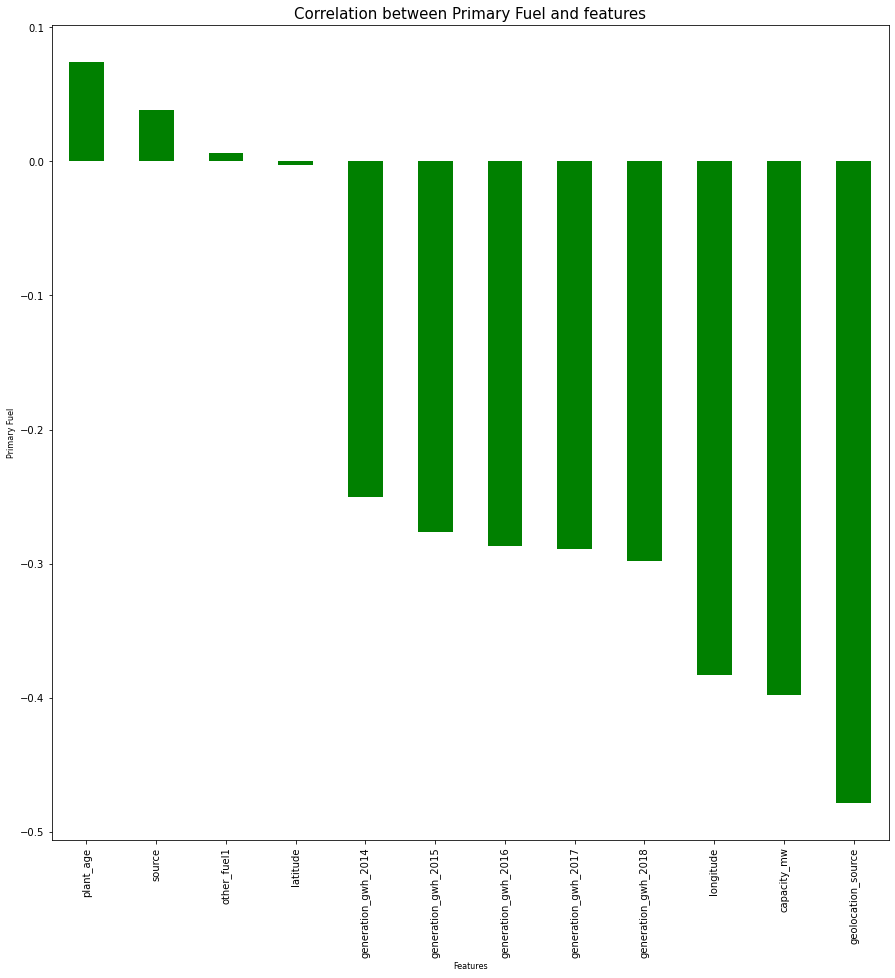

In [87]:
plt.figure(figsize=(15,15))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=8)
plt.ylabel('Primary Fuel',fontsize=8)
plt.title('Correlation between Primary Fuel and features',fontsize=15)
plt.show()

It is evident that latitude and other_fuel1 have very less correlation with the respective target columns. Therefore, it would be safe to drop the columns.

In [88]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


Prediction 1: capacity_mw

In [93]:
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

x.shape

(851, 10)

In [94]:
y.shape

(851,)

In [95]:
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
plant_age              1.280800
dtype: float64

In [112]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            851 non-null    float64
 1   primary_fuel         851 non-null    float64
 2   source               851 non-null    float64
 3   geolocation_source   851 non-null    float64
 4   generation_gwh_2014  851 non-null    float64
 5   generation_gwh_2015  851 non-null    float64
 6   generation_gwh_2016  851 non-null    float64
 7   generation_gwh_2017  851 non-null    float64
 8   generation_gwh_2018  851 non-null    float64
 9   plant_age            851 non-null    float64
dtypes: float64(10)
memory usage: 66.6 KB


In [96]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']

scaler = PowerTransformer(method = 'yeo-johnson')

In [97]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [98]:
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
plant_age              0.037156
dtype: float64

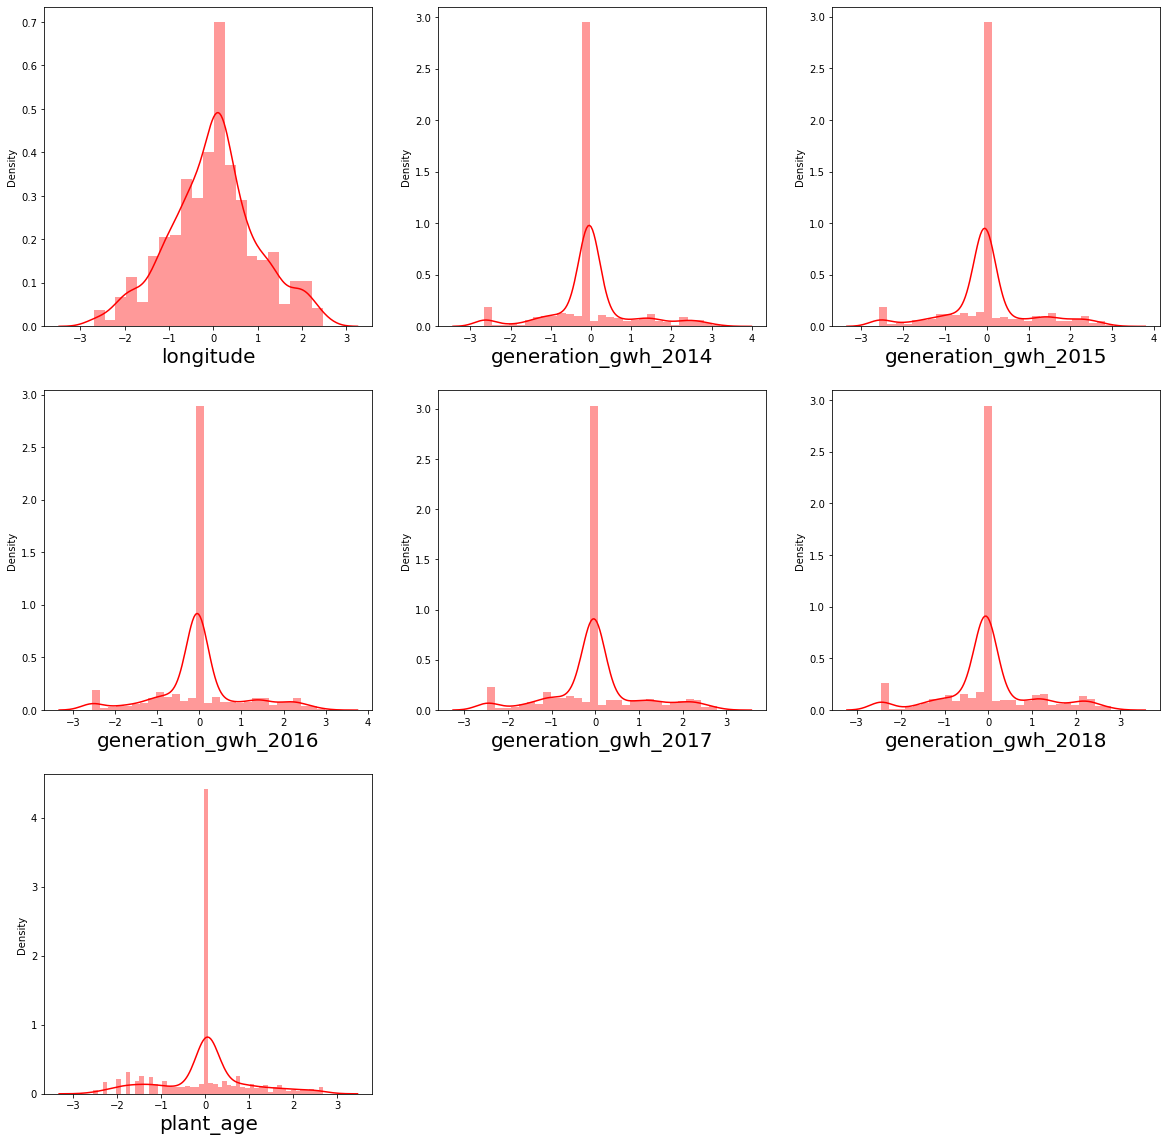

In [100]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

# Standard Scaler

In [101]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


In [102]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.310001,longitude
1,1.682873,primary_fuel
2,1.503736,source
3,1.875773,geolocation_source
4,3.604587,generation_gwh_2014
5,6.181987,generation_gwh_2015
6,9.956820,generation_gwh_2016
7,9.749451,generation_gwh_2017
8,8.951311,generation_gwh_2018
9,1.103741,plant_age


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [114]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.8576415279638356 at Random_state 84


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=maxRS)

In [116]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_rfr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_rfr))
print("MSE:",metrics.mean_squared_error(y_test,pred_rfr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

R2_Score: 0.85712145391773
MAE: 91.33922818023002
MSE: 23697.222616813127
RMSE: 153.9390223978739


In [110]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_gbr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_gbr))
print("MSE:",metrics.mean_squared_error(y_test,pred_gbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))

R2_Score: 0.8221772564978707
MAE: 94.21177443918846
MSE: 31558.11663378541
RMSE: 177.6460431132239


In [111]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_dtr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_dtr))
print("MSE:",metrics.mean_squared_error(y_test,pred_dtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

R2_Score: 0.7484957091380688
MAE: 104.6503274853801
MSE: 44634.34535202339
RMSE: 211.2684201484533


In [117]:
# KNN Regressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_knn))
print("MAE:",metrics.mean_absolute_error(y_test,pred_knn))
print("MSE:",metrics.mean_squared_error(y_test,pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))

R2_Score: 0.8446271068169022
MAE: 90.0952374269006
MSE: 25769.48141856187
RMSE: 160.52875573728798


In [118]:
print("Cross validation score for Random Forest Regressor:", cross_val_score(rfr,x,y,cv=5).mean(),"\n")
print("Cross validation score for Decision Tree Regressor:", cross_val_score(dtr,x,y,cv=5).mean(),"\n")
print("Cross validation score for KNN Regressor:", cross_val_score(knn,x,y,cv=5).mean(),"\n")
print("Cross validation score for Gradient Boosting Regressor:", cross_val_score(gbr,x,y,cv=5).mean())

Cross validation score for Random Forest Regressor: 0.7841116805636205 

Cross validation score for Decision Tree Regressor: 0.592722691249844 

Cross validation score for KNN Regressor: 0.7243835664633714 

Cross validation score for Gradient Boosting Regressor: 0.7516274759080517


From the R2 scores and the cross validation scores we can asscertain that Random Forest is the best model for the dataset.

In [119]:
#Hyperparameter Tuning
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,100],
             'max_depth':[2,4,5,6]}

In [121]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 100]})

In [122]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [123]:
best_mod = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=100)
best_mod.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2')

In [124]:
rfr_pred = best_mod.predict(x_test)
acc = r2_score(y_test,rfr_pred)
print(acc*100)

88.65662095801814


Random Forest Regression model gives us an accuracy score of 88.66%

In [125]:
a = np.array(y_test)
predicted = np.array(best_mod.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1050.0,1169.885452
1,1650.0,1217.932453
2,720.0,869.836037
3,10.0,30.642519
4,5.0,54.065631
...,...,...
166,62.5,136.466285
167,22.5,33.231704
168,135.0,234.834947
169,600.0,783.304245


Prediction 2: primary_fuel

In [127]:
x_pf = new_df.drop("primary_fuel",axis=1)
y_pf = new_df["primary_fuel"]

In [128]:
x_pf.shape

(851, 10)

In [129]:
y_pf.shape

(851,)

In [130]:
x_pf.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
plant_age              1.280800
dtype: float64

In [131]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']
scaler = PowerTransformer(method='yeo-johnson')

In [132]:
x_pf[skew] = scaler.fit_transform(x_pf[skew].values)
x_pf[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [133]:
x_pf.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
plant_age              0.037156
dtype: float64

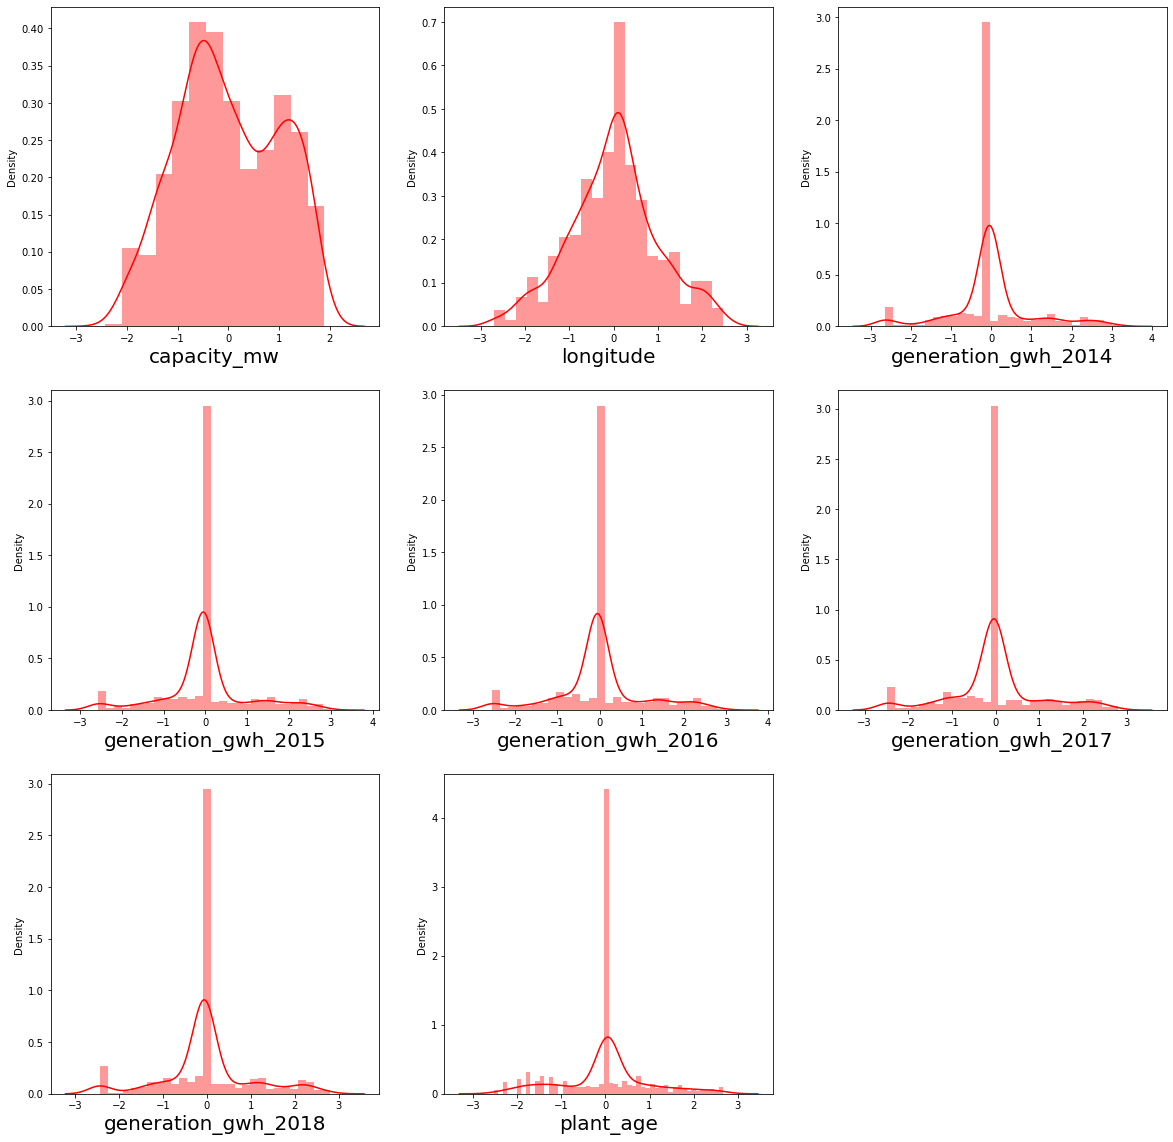

In [135]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in x_pf[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_pf[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [136]:
scaler = StandardScaler()
x_pf = pd.DataFrame(scaler.fit_transform(x_pf),columns = x_pf.columns)
x_pf

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


In [137]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_pf.values,i)
    for i in range(len(x_pf.columns))]
vif["Features"] = x_pf.columns
vif

,VIF values,Features
0,1.812831,capacity_mw
1,1.193721,longitude
2,1.413003,source
3,1.590920,geolocation_source
4,3.623098,generation_gwh_2014
5,6.190488,generation_gwh_2015
6,9.960383,generation_gwh_2016
7,9.766254,generation_gwh_2017
8,8.960982,generation_gwh_2018
9,1.155462,plant_age


In [138]:
y_pf.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [141]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_pf,y_pf = SM.fit_resample(x_pf,y_pf)

In [142]:
y_pf.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

In [143]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_pf_train,x_pf_test,y_pf_train,y_pf_test = train_test_split(x_pf,y_pf,test_size=.20,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_pf_train,y_pf_train)
    pred = DTC.predict(x_pf_test)
    acc = accuracy_score(y_pf_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.926509186351706 at random_state 72


In [144]:
x_pf_train,x_pf_test,y_pf_train,y_pf_test = train_test_split(x_pf,y_pf,test_size=.20,random_state=maxRS)

In [146]:
# Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_pf_train,y_pf_train)
predDTC = DTC.predict(x_pf_test)
print(accuracy_score(y_pf_test,predDTC))
print(confusion_matrix(y_pf_test,predDTC))
print(classification_report(y_pf_test,predDTC))

0.910761154855643
[[49  4  0  0  0  1  0  0]
 [ 2 31  0  7  3  1  0  0]
 [ 1  1 34  2  0  1  0  0]
 [ 0  3  1 37  2  0  0  0]
 [ 0  2  1  1 47  0  0  0]
 [ 0  0  0  1  0 43  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        54
           1       0.76      0.70      0.73        44
           2       0.94      0.87      0.91        39
           3       0.77      0.86      0.81        43
           4       0.90      0.92      0.91        51
           5       0.93      0.98      0.96        44
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        44

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381



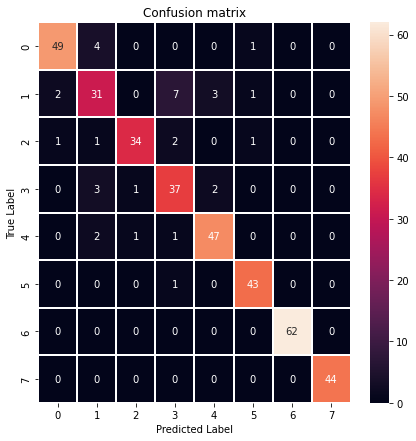

In [148]:
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_pf_test,predDTC),annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [149]:
# Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_pf_train,y_pf_train)
predRFC = RFC.predict(x_pf_test)
print(accuracy_score(y_pf_test,predRFC))
print(confusion_matrix(y_pf_test,predRFC))
print(classification_report(y_pf_test,predRFC))

0.9422572178477691
[[53  0  0  0  0  0  0  1]
 [ 3 31  2  6  1  1  0  0]
 [ 1  3 35  0  0  0  0  0]
 [ 0  1  0 42  0  0  0  0]
 [ 0  0  0  1 50  0  0  0]
 [ 0  0  0  2  0 42  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.89      0.70      0.78        44
           2       0.95      0.90      0.92        39
           3       0.82      0.98      0.89        43
           4       0.98      0.98      0.98        51
           5       0.98      0.95      0.97        44
           6       1.00      1.00      1.00        62
           7       0.98      1.00      0.99        44

    accuracy                           0.94       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.94      0.94      0.94       381



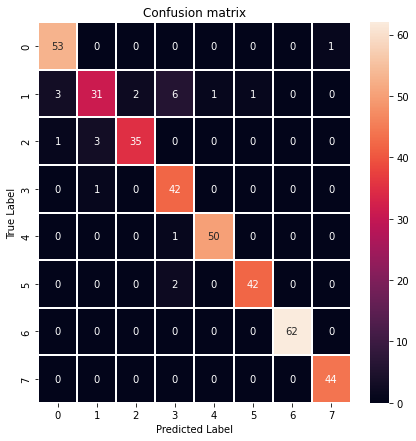

In [150]:
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_pf_test,predRFC),annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [151]:
# SVC
svc = SVC()
svc.fit(x_pf_train,y_pf_train)
predsvc = svc.predict(x_pf_test)
print(accuracy_score(y_pf_test,predsvc))
print(confusion_matrix(y_pf_test,predsvc))
print(classification_report(y_pf_test,predsvc))

0.8346456692913385
[[46  0  0  0  0  0  0  8]
 [ 5 26  3  3  3  2  0  2]
 [ 1  4 22  2  1  6  0  3]
 [ 0  1  4 30  0  0  0  8]
 [ 0  1  0  0 50  0  0  0]
 [ 1  1  0  0  0 39  0  3]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  1  0  0  0  0 43]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.79      0.59      0.68        44
           2       0.73      0.56      0.64        39
           3       0.86      0.70      0.77        43
           4       0.93      0.98      0.95        51
           5       0.83      0.89      0.86        44
           6       1.00      1.00      1.00        62
           7       0.64      0.98      0.77        44

    accuracy                           0.83       381
   macro avg       0.83      0.82      0.82       381
weighted avg       0.84      0.83      0.83       381



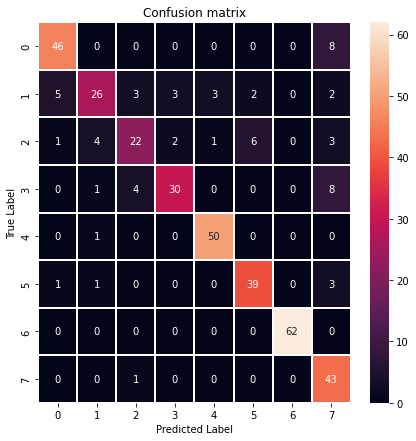

In [152]:
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_pf_test,predsvc),annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [153]:
# KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_pf_train,y_pf_train)
predknn = knn.predict(x_pf_test)
print(accuracy_score(y_pf_test,predknn))
print(confusion_matrix(y_pf_test,predknn))
print(classification_report(y_pf_test,predknn))

0.89501312335958
[[52  0  0  0  0  0  0  2]
 [ 4 26  2  6  3  2  0  1]
 [ 2  1 30  0  0  4  0  2]
 [ 0  1  4 37  0  1  0  0]
 [ 0  0  1  0 50  0  0  0]
 [ 1  0  1  0  0 42  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 1  0  0  0  0  1  0 42]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.93      0.59      0.72        44
           2       0.79      0.77      0.78        39
           3       0.86      0.86      0.86        43
           4       0.94      0.98      0.96        51
           5       0.84      0.95      0.89        44
           6       1.00      1.00      1.00        62
           7       0.89      0.95      0.92        44

    accuracy                           0.90       381
   macro avg       0.89      0.88      0.88       381
weighted avg       0.90      0.90      0.89       381



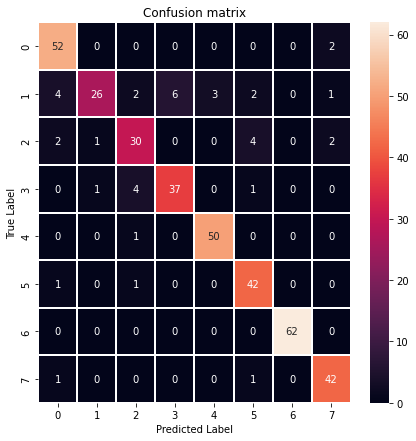

In [154]:
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_pf_test,predknn),annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [155]:
#Model Cross Validation
print("Cross Validation Score for Decision Tree Classifier:", cross_val_score(DTC,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for Random Forest Classifier:", cross_val_score(RFC,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for SVC:", cross_val_score(svc,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for KNN Classifier:", cross_val_score(knn,x_pf,y_pf,cv=5).mean())

Cross Validation Score for Decision Tree Classifier: 0.8629244370769443 

Cross Validation Score for Random Forest Classifier: 0.9149136621080259 

Cross Validation Score for SVC: 0.7920030390937975 

Cross Validation Score for KNN Classifier: 0.8497858820279044


From the R2 scores and the cross validation scores we can asscertain that Random Forest Classifier is the best model for the dataset.

In [156]:
parameters = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':[10,20,30],
              'min_samples_leaf':[2,3,5]}

In [157]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [158]:
GCV.fit(x_pf_train,y_pf_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5]})

In [159]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2}

In [160]:
best_mod1 = RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=20,min_samples_leaf=3)
best_mod1.fit(x_pf_train, y_pf_train)
pred = best_mod1.predict(x_pf_test)
acc = accuracy_score(y_pf_test,pred)
print(acc*100)

92.38845144356955


In [162]:
a = np.array(y_pf_test)
predicted = np.array(best_mod1.predict(x_pf_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_new

,Original,Predicted
0,5,5
1,1,2
2,1,1
3,3,3
4,1,2
...,...,...
376,0,0
377,1,1
378,6,6
379,7,7
